Process Data:

In [220]:
import math

# use math.dist() to find distances between points 
# store using dictionary adjacency list --> get complete graph
# filter out to get new graph again
# apply dijkstra's to get short path

# getting the points. it's in order from a-w
all_coordinates = [
    [0,0],
    [1.6, 0.6],
    [1.1, 1.2],
    [2.7, 1.8],
    [1.2, 2.4],
    [0, 3.6],
    [2.2, 3.4],
    [2.2, 4.6],
    [0.6, 5.2],
    [-1.2, 4.6],
    [0, 5.8],
    [-1.6, 6.4],
    [2.2, 6.8],
    [1.6, 7.4],
    [0, 7.8],
    [0, 8.8],
    [-1.6, 9.4],
    [0, 10.8],
    [0, 12.0],
    [2.2, 12.7],
    [1.1, 13.7],
    [1.6, 14.2],
    [-0.4, 15.4]
]
edge_weights = {}
# finding edge weights between all points. will be stored in a list (index is starting vertex) of lists (index is ending vertex)
for i in range(len(all_coordinates)):
    edge_list = []
    for j in range(i+1, len(all_coordinates)):
        edge_list.append(math.dist(all_coordinates[i],all_coordinates[j]))
    edge_weights[i] = edge_list
        # outer loop index inner loop = math.dist([first point], [second point])

print(edge_weights)
print(len(edge_weights[0]))

{0: [1.7088007490635062, 1.6278820596099706, 3.2449961479175906, 2.6832815729997477, 3.6, 4.049691346263318, 5.0990195135927845, 5.2345009313209605, 4.7539457296018846, 5.8, 6.596969000988257, 7.147027354082255, 7.57099729229908, 7.8, 8.8, 9.535197952848174, 10.8, 12.0, 12.889142717807108, 13.744089638822937, 14.289856542317, 15.40519392932137], 1: [0.7810249675906654, 1.6278820596099708, 1.8439088914585773, 3.4, 2.8635642126552705, 4.044749683231337, 4.707440918375928, 4.88262224629348, 5.440588203494178, 6.6241980646716785, 6.2289646009589745, 6.800000000000001, 7.37563556583431, 8.35463942968217, 9.363759928575702, 10.324727599312247, 11.511733144926527, 12.11486689980538, 13.10953851209111, 13.6, 14.934523762075576], 2: [1.7088007490635064, 1.2041594578792294, 2.6400757564888173, 2.459674775249769, 3.573513677041127, 4.031128874149275, 4.104875150354758, 4.729693436154187, 5.8591808301161015, 5.70701322935211, 6.220128616033595, 6.691038783328041, 7.679192665899197, 8.6330759292386

Getting Complete Graph 

(Note: adjusted above code to get a dictionary with alphabet letters as keys, and for values a dictionary of the edge weights instead of a list)

In [221]:
import string
# getting our used letters
letters = string.ascii_uppercase
nodes_list = letters[:23]

print(nodes_list)

ABCDEFGHIJKLMNOPQRSTUVW


In [222]:
complete_graph = {} # overall dictionary ex. {"A": {"B":3, "C":4}}
# finding edge weights between all points. will be stored in a list (index is starting vertex) of lists (index is ending vertex)
for i in range(len(all_coordinates)):
    edge_weights_dict = {} # inner dictionary of edge weights to other nodes (ex. "A": 2) 
    for j in range(i+1, len(all_coordinates)):
        if i != j:
            # Calculate distance and store in both directions
            distance = math.dist(all_coordinates[i], all_coordinates[j])
            edge_weights_dict[nodes_list[j]] = distance # store edge to j with weights
    complete_graph[nodes_list[i]] = edge_weights_dict
        # outer loop index inner loop = math.dist([first point], [second point])

print(complete_graph)
print(complete_graph["A"])



{'A': {'B': 1.7088007490635062, 'C': 1.6278820596099706, 'D': 3.2449961479175906, 'E': 2.6832815729997477, 'F': 3.6, 'G': 4.049691346263318, 'H': 5.0990195135927845, 'I': 5.2345009313209605, 'J': 4.7539457296018846, 'K': 5.8, 'L': 6.596969000988257, 'M': 7.147027354082255, 'N': 7.57099729229908, 'O': 7.8, 'P': 8.8, 'Q': 9.535197952848174, 'R': 10.8, 'S': 12.0, 'T': 12.889142717807108, 'U': 13.744089638822937, 'V': 14.289856542317, 'W': 15.40519392932137}, 'B': {'C': 0.7810249675906654, 'D': 1.6278820596099708, 'E': 1.8439088914585773, 'F': 3.4, 'G': 2.8635642126552705, 'H': 4.044749683231337, 'I': 4.707440918375928, 'J': 4.88262224629348, 'K': 5.440588203494178, 'L': 6.6241980646716785, 'M': 6.2289646009589745, 'N': 6.800000000000001, 'O': 7.37563556583431, 'P': 8.35463942968217, 'Q': 9.363759928575702, 'R': 10.324727599312247, 'S': 11.511733144926527, 'T': 12.11486689980538, 'U': 13.10953851209111, 'V': 13.6, 'W': 14.934523762075576}, 'C': {'D': 1.7088007490635064, 'E': 1.204159457879

Filtering graph 

Computing threshold

Hand: 18 cm wide
Arm: 56 cm (shoulder to tip of hand)
A to B is 36 cm 
Convert 36 cm to 1.6 —> aka 22.5 : 1 ratio
Threshold of 56 cm to our metric —> 2.48 threshold

2.5 ft threshold

In [223]:
# getting filtered graph, same as complete but added check
filtered_graph = {} # overall dictionary ex. {"A": {"B":3, "C":4}}
# finding edge weights between all points. will be stored in a list (index is starting vertex) of lists (index is ending vertex)
for i in range(len(all_coordinates)):
    edge_weights_dict = {} # inner dictionary of edge weights to other nodes (ex. "A": 2) 
    for j in range(i+1, len(all_coordinates)):
        if i != j:
            # Calculate distance and store in both directions
            distance = math.dist(all_coordinates[i], all_coordinates[j])
            if distance < 2.5:
                edge_weights_dict[nodes_list[j]] = distance # store edge to j with weights
    filtered_graph[nodes_list[i]] = edge_weights_dict
        # outer loop index inner loop = math.dist([first point], [second point])

print(filtered_graph)
print(filtered_graph["A"])

{'A': {'B': 1.7088007490635062, 'C': 1.6278820596099706}, 'B': {'C': 0.7810249675906654, 'D': 1.6278820596099708, 'E': 1.8439088914585773}, 'C': {'D': 1.7088007490635064, 'E': 1.2041594578792294, 'G': 2.459674775249769}, 'D': {'E': 1.6155494421403513, 'G': 1.676305461424021}, 'E': {'F': 1.6970562748477143, 'G': 1.4142135623730951, 'H': 2.416609194718914}, 'F': {'G': 2.209072203437452, 'H': 2.4166091947189146, 'I': 1.7088007490635062, 'J': 1.5620499351813306, 'K': 2.1999999999999997}, 'G': {'H': 1.1999999999999997, 'I': 2.4083189157584592}, 'H': {'I': 1.7088007490635064, 'M': 2.2}, 'I': {'J': 1.8973665961010275, 'K': 0.8485281374238568, 'M': 2.262741699796952, 'N': 2.4166091947189146}, 'J': {'K': 1.6970562748477143, 'L': 1.8439088914585782}, 'K': {'L': 1.7088007490635064, 'M': 2.4166091947189146, 'N': 2.2627416997969525, 'O': 2.0}, 'L': {'O': 2.1260291625469296}, 'M': {'N': 0.8485281374238575, 'O': 2.4166091947189146}, 'N': {'O': 1.6492422502470643, 'P': 2.12602916254693}, 'O': {'P': 1.

Implementing Dijkstra's Algorithm

In [224]:
from heapq import heapify, heappop, heappush

class Graph:
    def __init__(self, graph: dict = {}):
       self.graph = graph  # A dictionary for the adjacency list
    
    def add_edge(self, node1, node2, weight):
        if node1 not in self.graph:  # Check if the node is already added
           self.graph[node1] = {}  # If not, create the node
        self.graph[node1][node2] = weight  # Else, add a connection to its neighbor
    
    def shortest_distances(self, source: str):
        # Initialize the values of all nodes with infinity
        distances = {node: float("inf") for node in self.graph}
        distances[source] = 0  # Set the source value to 0

        # Initialize a priority queue
        pq = [(0, source)]
        heapify(pq)

        # Create a set to hold visited nodes
        visited = set()

        while pq:  # While the priority queue isn't empty
            current_distance, current_node = heappop(pq)  # Get the node with the min distance

            if current_node in visited:
                continue  # Skip already visited nodes
            visited.add(current_node)  # Else, add the node to visited set
        
            for neighbor, weight in self.graph[current_node].items():
            # Calculate the distance from current_node to the neighbor
                tentative_distance = current_distance + weight
                if tentative_distance < distances[neighbor]:
                    distances[neighbor] = tentative_distance
                    heappush(pq, (tentative_distance, neighbor))
            
            # calculate the path 
            predecessors = {node: None for node in self.graph}
            for node, distance in distances.items():
                for neighbor, weight in self.graph[node].items():
                    if distances[neighbor] == distance + weight:
                        predecessors[neighbor] = node

        return distances, predecessors
    
    def shortest_path(self, source: str, target: str):
        # Generate the predecessors dict
        _, predecessors = self.shortest_distances(source)

        path = []
        current_node = target

        # Backtrack from the target node using predecessors, until source node reached
        while current_node:
            path.append(current_node)
            current_node = predecessors[current_node]

        # Reverse the path and return it
        path.reverse()

        return path

In [225]:
G = Graph(filtered_graph)
shortest_path_AW = G.shortest_path("A", "W")
shortest_path_HW = G.shortest_path("H", "W")
print(f'From bottom A to top W: {shortest_path_AW}')
print(f'From actual start hold H to top W: {shortest_path_HW}')


From bottom A to top W: ['A', 'C', 'E', 'F', 'K', 'O', 'P', 'R', 'S', 'U', 'W']
From actual start hold H to top W: ['H', 'M', 'N', 'P', 'R', 'S', 'U', 'W']


## RDP

In [226]:
all_coordinates_dict = {}
for node, coordinate in zip(nodes_list, all_coordinates):
    all_coordinates_dict[node] = coordinate

In [227]:
shortest_path_HW_coord = [0] * len(shortest_path_HW)
for i, node in enumerate(shortest_path_HW):
    shortest_path_HW_coord[i] = all_coordinates_dict[node]
shortest_path_HW_coord

[[2.2, 4.6],
 [2.2, 6.8],
 [1.6, 7.4],
 [0, 8.8],
 [0, 10.8],
 [0, 12.0],
 [1.1, 13.7],
 [-0.4, 15.4]]

In [228]:
import matplotlib.pyplot as plt
def draw_path(coordinates): 
    # Extract x and y coordinates for plotting
    x_values = [coord[0] for coord in coordinates]
    y_values = [coord[1] for coord in coordinates]

    # Plot the points and connect them with lines
    plt.figure(figsize=(8, 12))
    plt.plot(x_values, y_values, marker='o', color='b', linestyle='-', linewidth=1, markersize=5)

    # Label axes and show grid
    plt.xlabel("X Coordinates")
    plt.ylabel("Y Coordinates")
    plt.title("Plot of Coordinates with Connected Lines")
    plt.grid(True)

    # Show plot
    plt.show()
# draw_path(shortest_path_HW_coord)

In [229]:
from rdp import rdp 
final_route = rdp(shortest_path_HW_coord, epsilon=0.1)
final_route

[[2.2, 4.6], [2.2, 6.8], [0.0, 8.8], [0.0, 12.0], [1.1, 13.7], [-0.4, 15.4]]

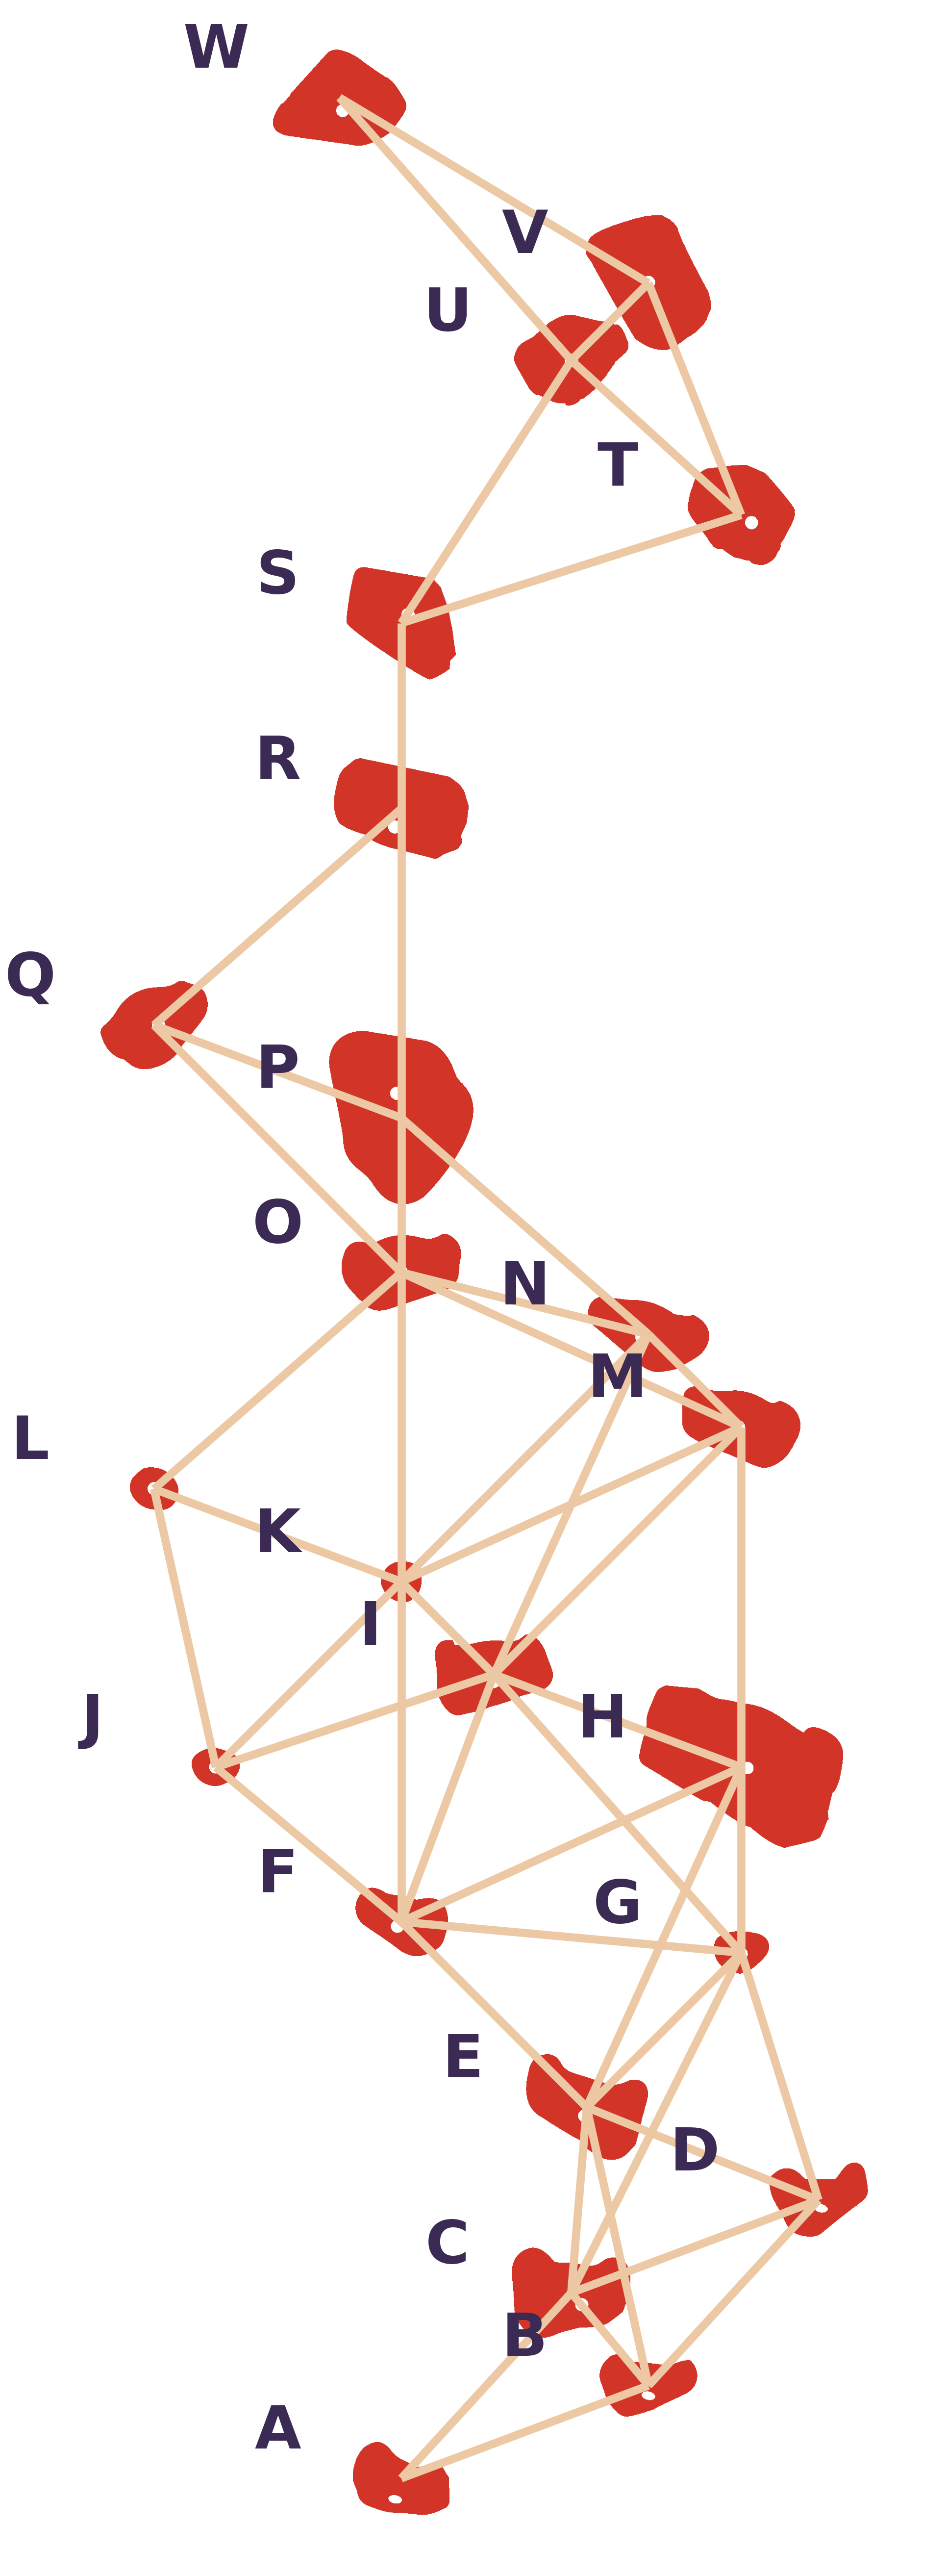

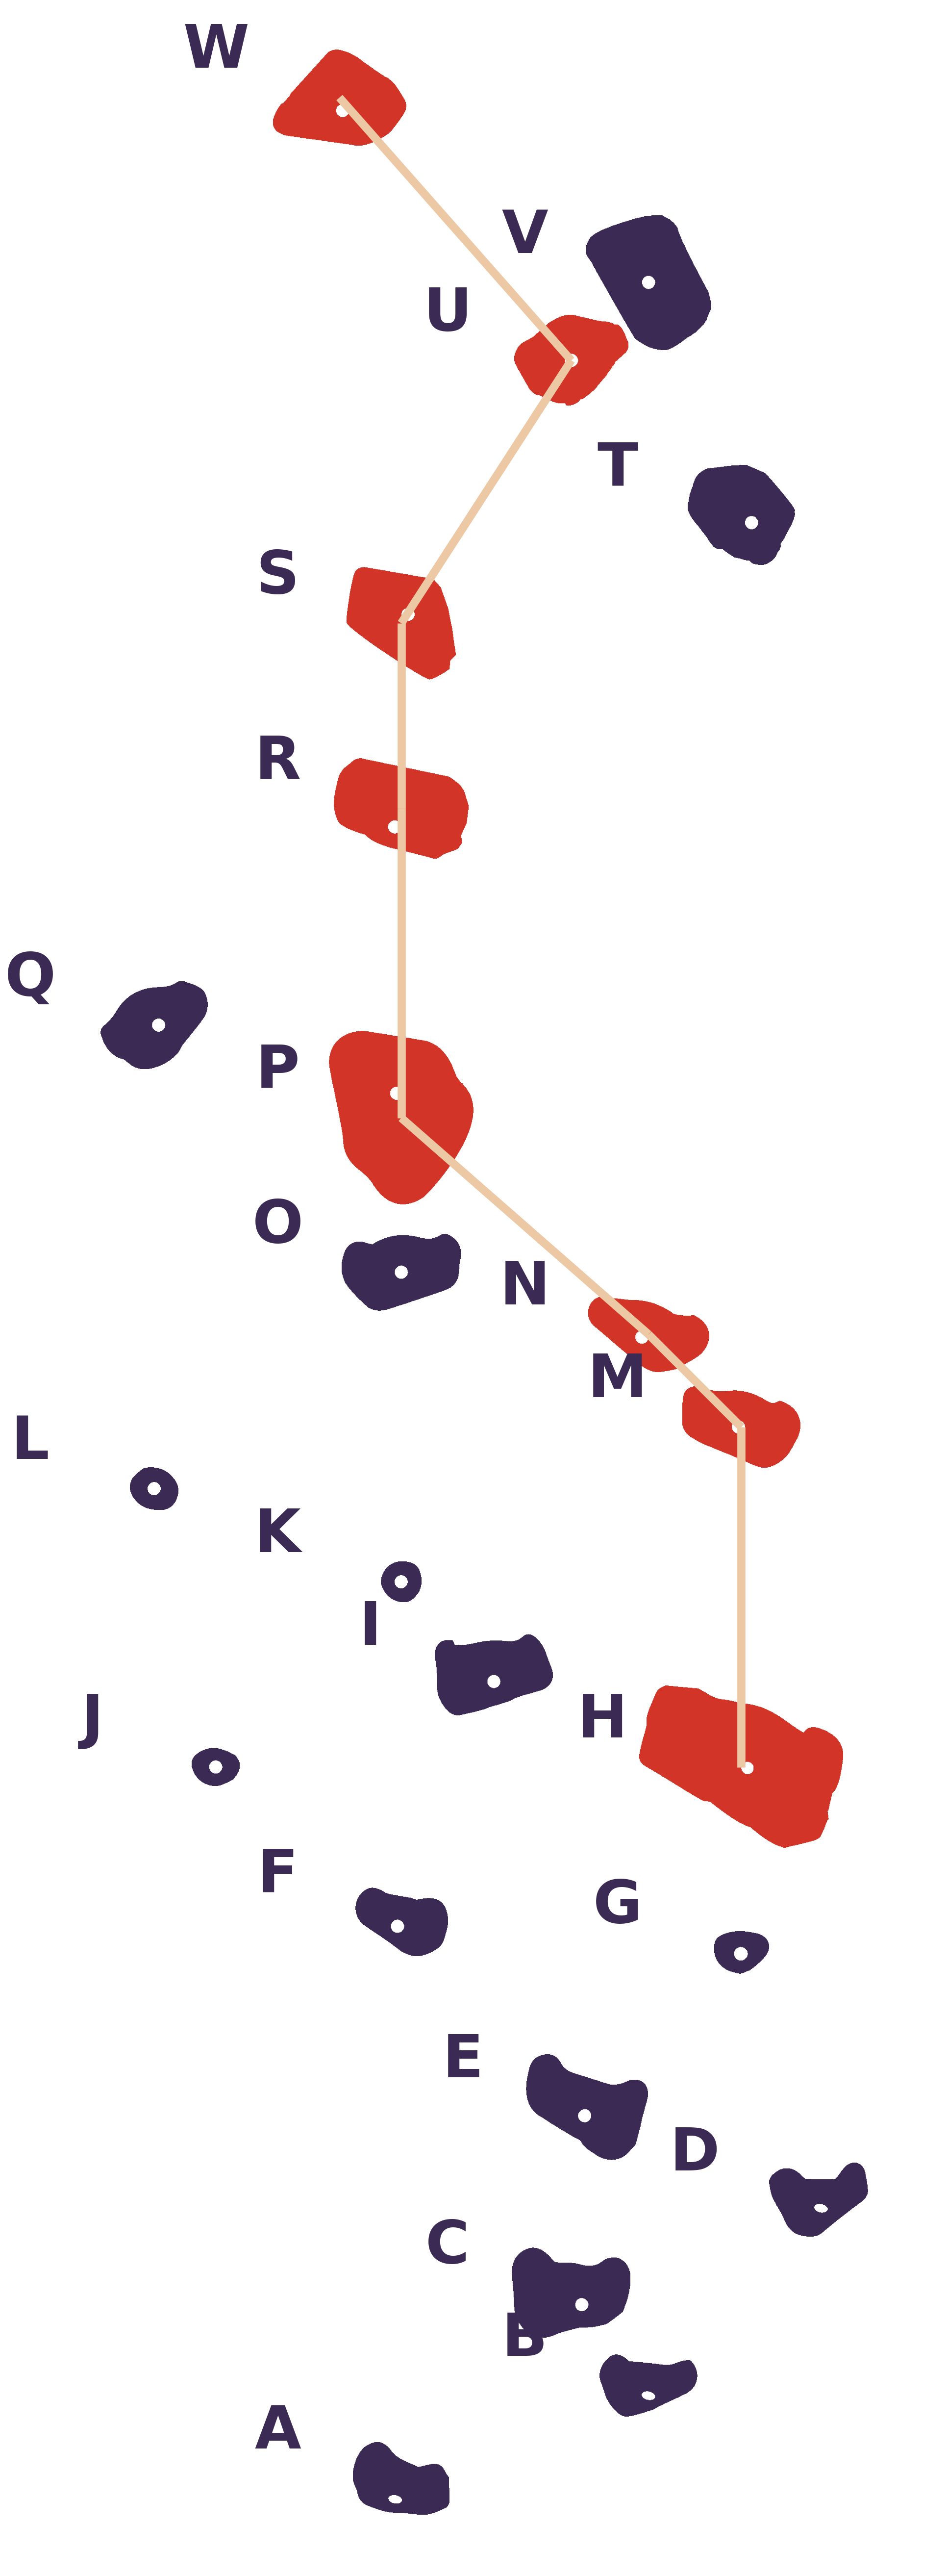

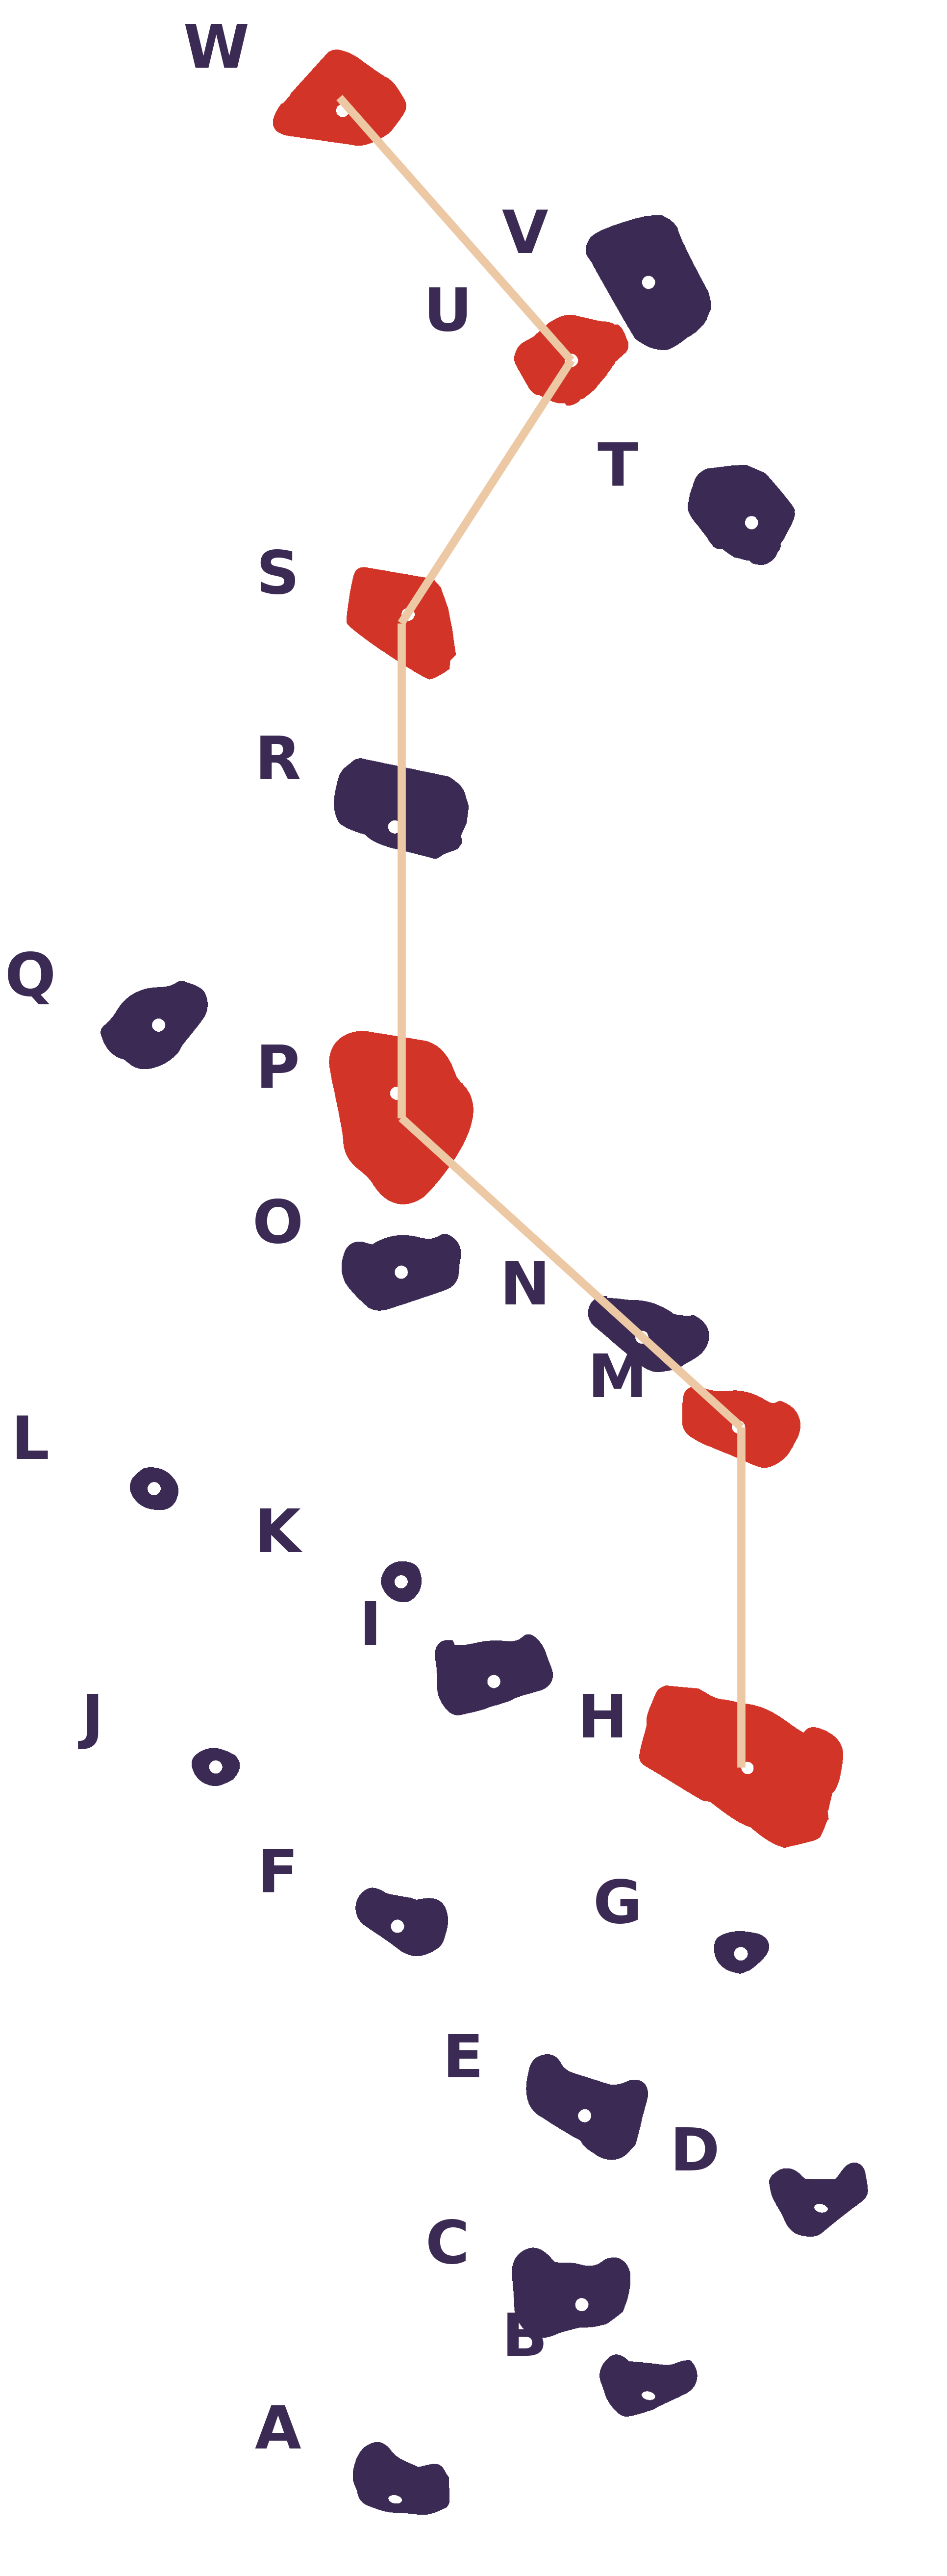

In [230]:
### Visualizations
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx

image_path = 'rock_node_images/'
size_mulitplier = 8
width, height = 3*size_mulitplier, 15*size_mulitplier

def load_images(G, coordinates, edged_coordinates, color):
    """
    Loads climbing hold images based on whether the node is in edge_names. If it is,
    it loads from red, if not, it loads from whatever color is provided in color

    """
    node_index = 0
    for i, node in enumerate(all_coordinates):
        if node in coordinates:
            if edged_coordinates:
                img_color = 'red' if all_coordinates[i] in edged_coordinates else color
            else:
                img_color = color
            G.add_node(node_index, image=mpimg.imread(f"{image_path}{img_color}/{nodes_list[i]}@10x.png"))
            node_index+=1

def add_edges(G, coordinates, edged_coordinates, edge_weight, COMPLETE):
    """
    Adds edges to the graph based on edged coordinates or all coordinates. The
    all coordinates functionality is for drawing a complete graph
    """
    if edged_coordinates:
        for i in range(len(edged_coordinates) - 1):
            start_idx = coordinates.index(edged_coordinates[i])
            end_idx = coordinates.index(edged_coordinates[i + 1])
            G.add_edge(start_idx, end_idx, weight=edge_weight)
    elif not COMPLETE:
        for i in range(len(coordinates)):
            for j in range(i + 1, len(coordinates)):
                # Calculate distance and store in both directions
                distance = math.dist(all_coordinates[i], all_coordinates[j])
                if distance < 2.5:
                    G.add_edge(i, j, weight=edge_weight)
    else:
        for i in range(len(coordinates)):
            for j in range(i + 1, len(coordinates)):
                G.add_edge(i, j, weight=edge_weight)


def draw_images(ax, G, pos):
    """
    Plots climbing hold images onto the graph given the graph object and the positions of 
    the coordinates. Maintains the aspect ratio of each image and scales them according to
    a scale factor
    """
    for node, data in G.nodes(data=True):
        image = data["image"]
        image_height, image_width = image.shape[:2]
        scale_factor = 0.0028
        scaled_width = image_width * scale_factor
        scaled_height = image_height * scale_factor
        ax.imshow(image, aspect='equal',
                  extent=(pos[node][0] - scaled_width / 2, pos[node][0] + scaled_width / 2,
                          pos[node][1] - scaled_height / 2, pos[node][1] + scaled_height / 2))

def graph_plotter(edge_names=None, title=None, coordinates=all_coordinates, COMPLETE=False, size_multiplier=size_mulitplier):
    """
    Plots the climb
    """
    if isinstance(coordinates[0], str):
        print("i received a string")
        coordinates = [all_coordinates_dict[node] for node in coordinates]
        print(coordinates==all_coordinates)

    G = nx.Graph()
    pos = {i: point for i, point in enumerate(coordinates)}

    if edge_names and isinstance(edge_names[0], str):
        edged_coordinates = [all_coordinates_dict[node] for node in edge_names]
    else:
        edged_coordinates = edge_names
    edge_weight = 1.5*size_multiplier if not COMPLETE else 0.5
    color = 'purple' if edge_names else 'red'
    
    add_edges(G, coordinates, edged_coordinates, edge_weight, COMPLETE)
    load_images(G, coordinates, edged_coordinates, color)

    fig, ax = plt.subplots(figsize=(width, height))
    nx.draw(G, pos, ax=ax, width=edge_weight, edge_color="#ECC9A4", node_size=0)

    draw_images(ax, G, pos)
    
    # Add labels
    for node, (x, y) in pos.items():
        index = all_coordinates.index([x,y])
        label = string.ascii_uppercase[index]
        offset_x = -0.9 if label == "H" else -0.8
        if label == "U" or "V":
            offset_y = 0.3
        elif label == "B":
            offset_y = 0
        else: offset_y = 0
        ax.text(x + offset_x, 
                y + offset_y, 
                label, 
                fontsize=11*size_multiplier, 
                color='#3B2A53', 
                fontweight="bold", 
                ha='center', 
                va='center'
                )

    x_margin, y_margin = 0.8, 0.6
    ax.set_xlim(min(x for x, y in pos.values()) - x_margin, max(x for x, y in pos.values()) + x_margin)
    ax.set_ylim(min(y for x, y in pos.values()) - y_margin, max(y for x, y in pos.values()) + y_margin)

    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()

# graph_plotter(COMPLETE=True)
graph_plotter()
graph_plotter(shortest_path_HW)
graph_plotter(final_route)
# graph_plotter(edge_names="HW", coordinates=string.ascii_uppercase[7:23])
# graph_plotter(edge_names="HPW", coordinates=shortest_path_HW)